In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading in the CSV files

In [14]:
# reading csv file
df2010 = pd.read_csv("NYC Census Data Race 2010.csv")
df2020 = pd.read_csv("NYC Census Data Race 2020.csv")


In [24]:
df2010["Year"]=2010
display(df2010.head())

,Label (Grouping),Bronx,Brooklyn,Manhattan,Queens,Staten Island,year,Year
0,Total:,"1,385,108","2,504,700","1,585,873","2,230,722","468,730",2010,2010
1,Hispanic or Latino,"741,413","496,285","403,577","613,750","81,051",2010,2010
2,Not Hispanic or Latino:,"643,695","2,008,415","1,182,296","1,616,972","387,679",2010,2010
3,Population of one race:,"627,733","1,968,405","1,152,339","1,560,865","381,039",2010,2010
4,White alone,"151,209","893,306","761,493","616,727","300,169",2010,2010


In [21]:
df2020["Year"]=2020
display(df2020.head())

,Label (Grouping),Bronx,Brooklyn,Manhattan,Queens,Staten Island,year,Year
0,Total:,"1,472,654","2,736,074","1,694,251","2,405,464","495,747",2020,2020
1,Hispanic or Latino,"806,463","516,426","402,640","667,861","96,960",2020,2020
2,Not Hispanic or Latino:,"666,191","2,219,648","1,291,611","1,737,603","398,787",2020,2020
3,Population of one race:,"637,821","2,106,478","1,228,622","1,653,491","387,469",2020,2020
4,White alone,"130,796","968,427","793,294","549,358","277,981",2020,2020


In [20]:
all_data=pd.concat([df2010,df2020])

In [27]:
all_data=df.groupby(['NYC Census Data Race 2010.csv' 'NYC Census Data Race 2020.csv']).size().unstack().plot(kind='bar', stacked=True)

NameError: name 'df' is not defined

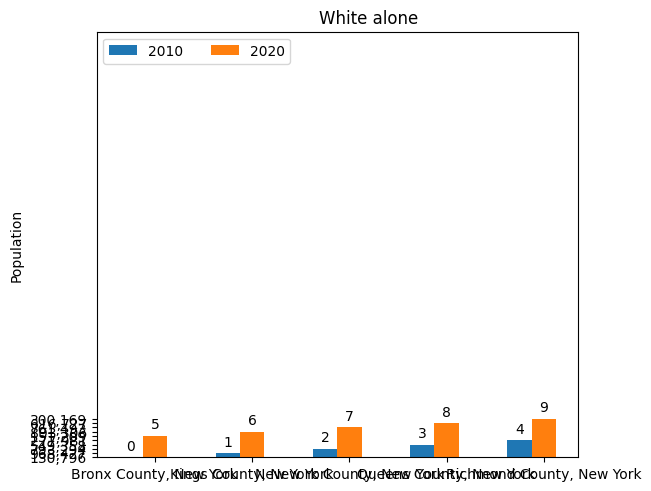

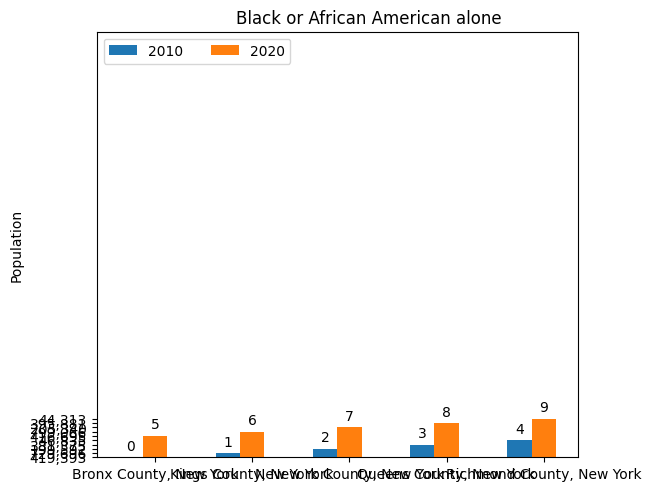

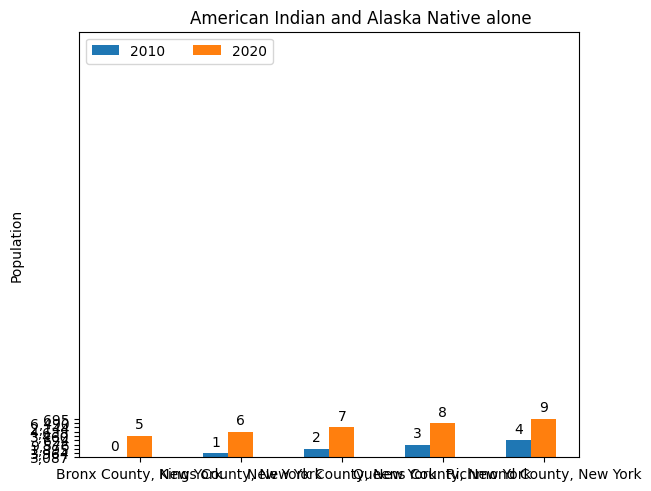

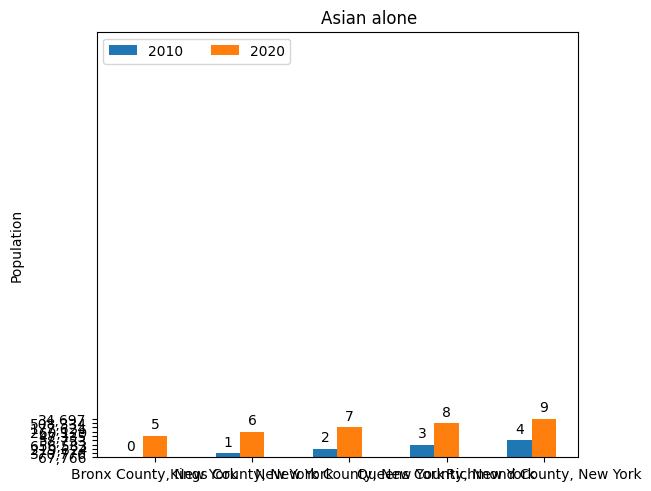

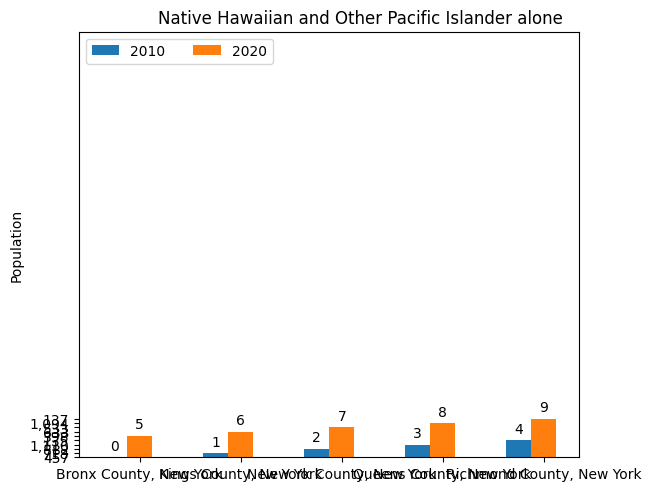

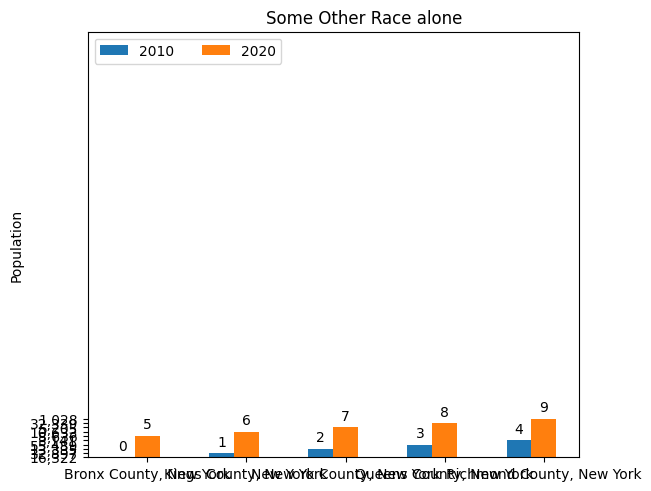

In [ ]:
# Restructure the dataframe
years = ['2010', '2020']
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] #[x + " County, New York" for x in ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond']] #
races = [race.strip(' ') for race in df2010['Label (Grouping)']]

for i in range(len(races)): # i represents the row number
    data = {'2010':[], '2020':[]}


    race = races[i]

    if 'alone' in race or race == "Hispanic or Latino":

        for borough in boroughs:
            data['2010'].append(df2010[borough][i]) # 2010 data
            data['2020'].append(df2020[borough][i]) # 2020 data

        fig, ax = plt.subplots(layout='constrained')

        x = np.arange(len(boroughs))  # the label locations
        width = 0.25  # the width of the bars
        multiplier = 0

        for year, pop in data.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, pop, width, label=year)
            ax.bar_label(rects, padding=3)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Population')
        ax.set_title(race)
        ax.set_xticks(x + width, boroughs)
        ax.legend(loc='upper left', ncols=3)
        ax.set_ylim(0, 100)

        fig.show()